<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Causal Inference In Statistics - A Primer</h1>
        <h1>1.4 Graphs</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
    <div style="float: right; margin-right:10px;"> <p><a href="https://amzn.to/3gsFlkO" target=_blank><img src='data/causality.jpeg' width='100px'>
        <!--Amazon Affiliate Link--></a></p></div>
</div>

In [2]:
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 

import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [3]:
%watermark -n -v -m -g -iv

pandas     1.0.1
watermark  2.0.2
json       2.0.9
networkx   2.4
matplotlib 3.1.3
autopep8   1.5
numpy      1.18.1
Fri Oct 16 2020 

CPython 3.7.3
IPython 6.2.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   : 4eecd30344d5677356267e69b3559341d7f43a0d


Load default figure style

In [4]:
plt.style.use('./d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Graphs

Graphs allow us to represent relationships (edges) between entities (nodes). We will use the [NetworkX](https://networkx.github.io/) Python package to handle all of our graphs for the rest of the course.

We start by instanciating a new Graph object

In [5]:
G = nx.Graph()

We can add nodes one by one or from a list of nodes. Any Python hashable object can be a node:

In [6]:
G.add_nodes_from(['X', 'Y', 'Z'])

Similarly, we can add edges one by one of from a list. Edges are a pair of nodes with an optional dictionary contianing data about the edge:

In [7]:
G.add_edges_from([('X', 'Y', {'label':'A'}), ('Y', 'Z', {'label':'B'})])

NetworkX has an extensive set of drawing functionality. We can simply draw the graph directly:

/Users/bgoncalves/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/Users/bgoncalves/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:122: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


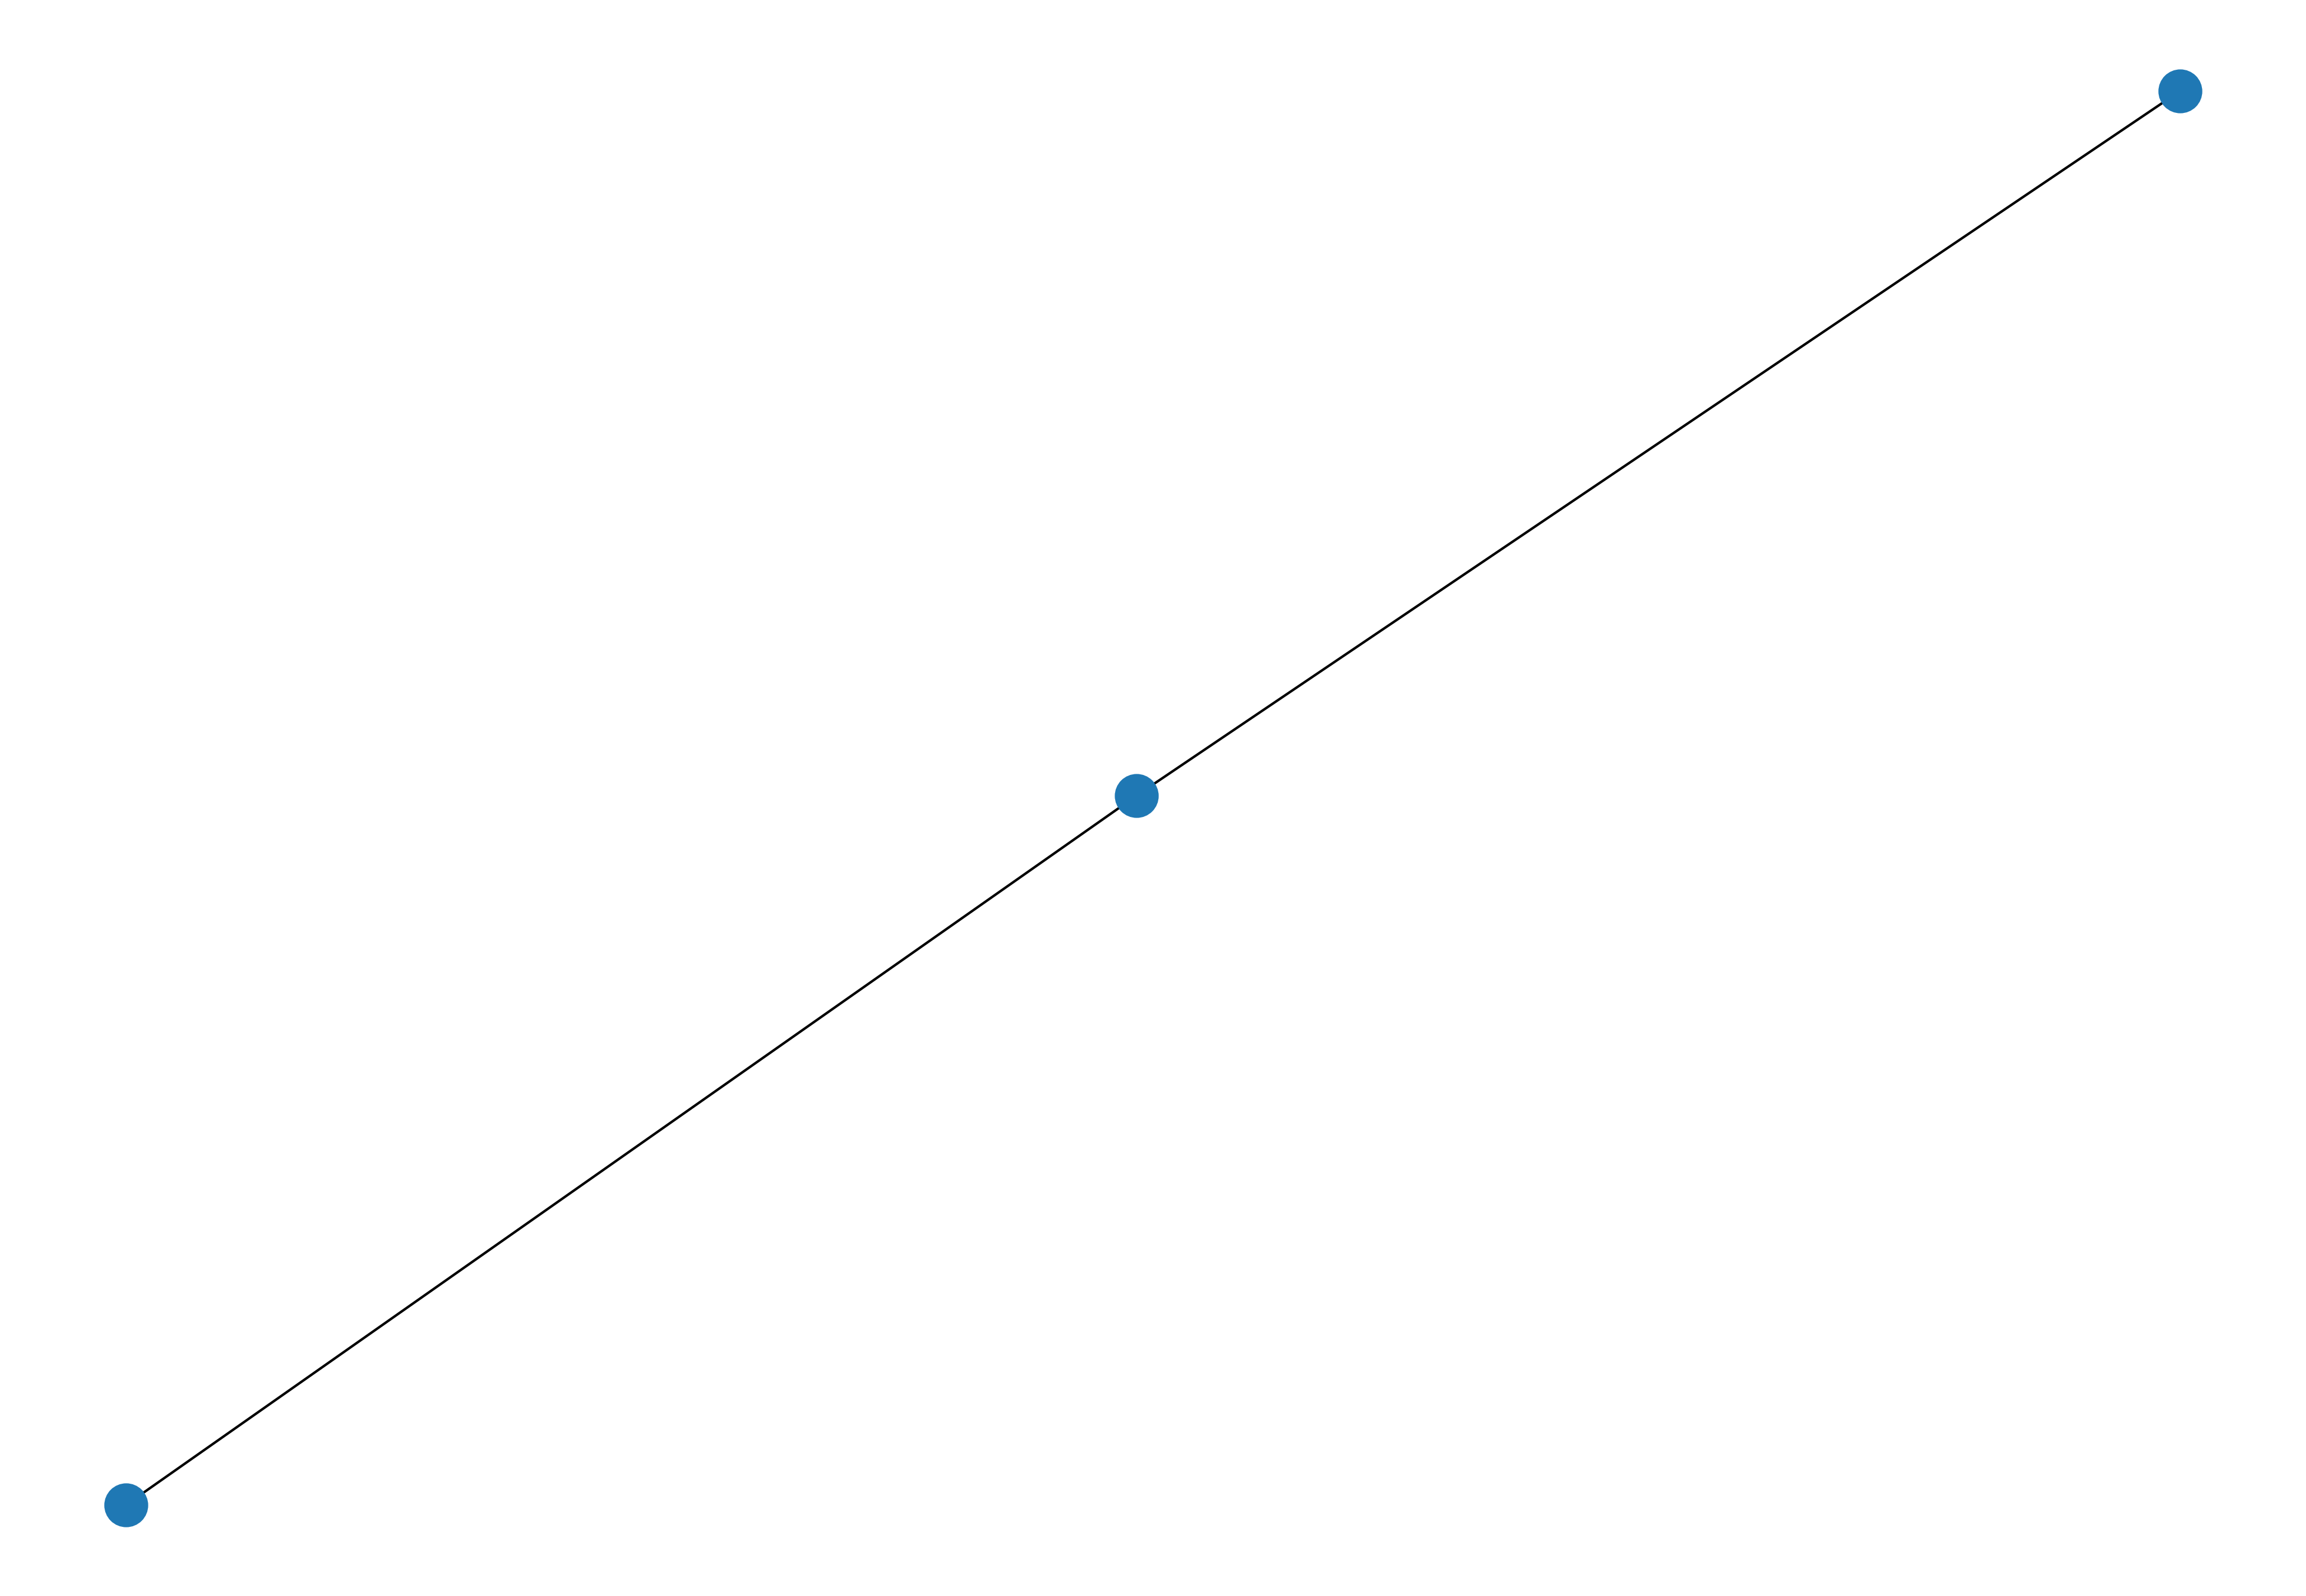

In [8]:
nx.draw(G)

Or customize the plot by definining our own layout (node coordinates):

In [9]:
pos = {'X':(-1, 0), 'Y':(0, 0), 'Z':(1, 0)}
labels = {(node_i, node_j) : label for node_i, node_j, label in G.edges(data='label', default='')}

And the way we want the graph to be plotted using Matplotlib.

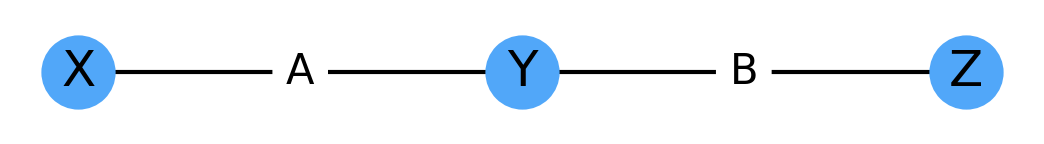

In [10]:
fig, ax = plt.subplots(1, figsize=(4,1))
nx.draw(G, pos, ax=ax, node_color=colors[0])
nx.draw_networkx_labels(G, pos, ax=ax)
nx.draw_networkx_edge_labels(G, pos, labels, ax=ax)
fig.tight_layout()

To create a directed graph, we simply use DiGraph()

In [11]:
G = nx.DiGraph()
G.add_nodes_from(['X', 'Y', 'Z'])
G.add_edges_from([('X', 'Y', {'label':'A'}), ('Y', 'Z', {'label':'B'})])

And we can plot it in just the same way

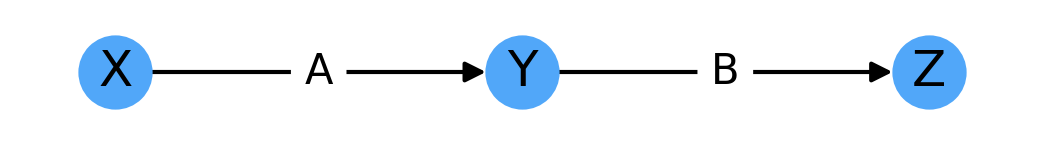

In [12]:
pos = {'X':(-1, 0), 'Y':(0, 0), 'Z':(1, 0)}
labels = {(node_i, node_j) : label for node_i, node_j, label in G.edges(data='label', default='')}

fig, ax = plt.subplots(1, figsize=(4,1))
nx.draw(G, pos, ax=ax, node_color=colors[0])
nx.draw_networkx_labels(G, pos, ax=ax)
nx.draw_networkx_edge_labels(G, pos, labels, ax=ax)
fig.tight_layout()

And if we add mode edges, the layout naturally needs to change as well

In [15]:
G = nx.DiGraph()
G.add_edges_from([
    ('U', 'X', {'label':'A'}),
    ('U', 'Y', {'label':'C'}),
    ('X', 'Y', {'label':'B'})])

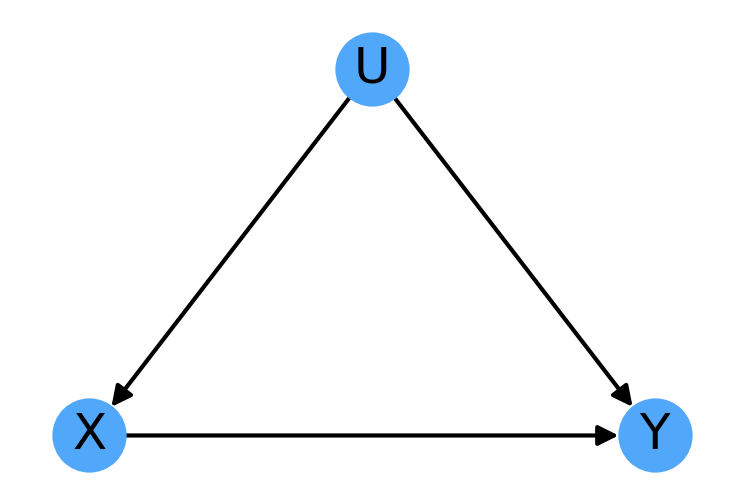

In [17]:
pos = {'U': (0, 1), 'X': (-1, 0), 'Y': (1, 0)}
labels = {(node_i, node_j) : label for node_i, node_j, label in G.edges(data='label', default='')}

fig, ax = plt.subplots(1, figsize=(3,2.2))
nx.draw(G, pos, ax=ax, node_color=colors[0])
nx.draw_networkx_labels(G, pos, ax=ax)
#nx.draw_networkx_edge_labels(G, pos, labels, ax=ax)
fig.tight_layout()

And yet another example

In [14]:
G = nx.DiGraph()
G.add_edges_from([
    ('X', 'Y'),
    ('X', 'W'),
    ('W', 'Y'),
    ('W', 'Z'),
    ('Y', 'T'),
    ('Y', 'Z'),
    ('Z', 'T')])

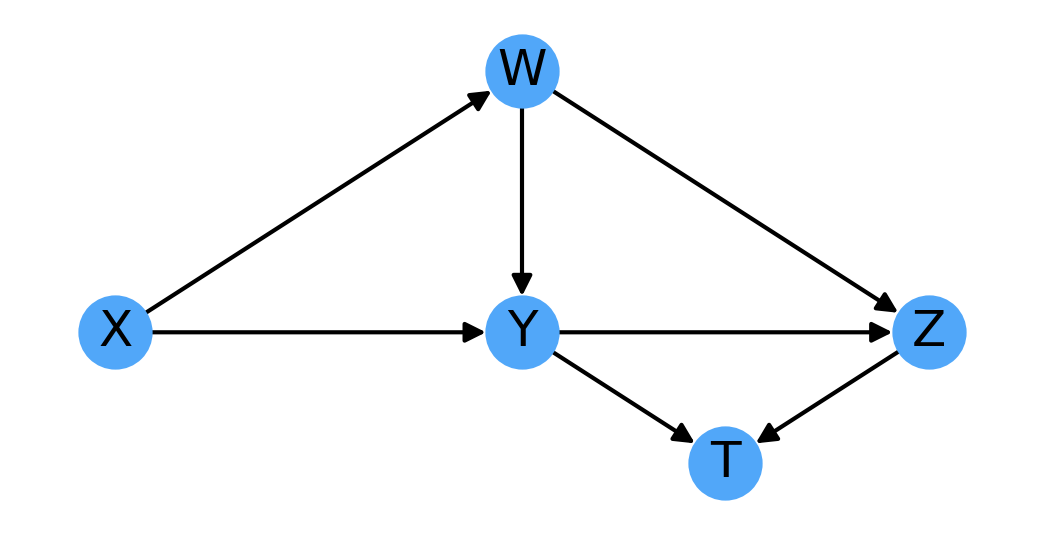

In [15]:
pos = {'X': (-1, 0), 'Y': (0, 0), 'Z': (1, 0), 'W': (0, 1), 'T' : (0.5, -0.5)}

fig, ax = plt.subplots(1, figsize=(4,2.3))
nx.draw(G, pos, ax=ax, node_color=colors[0])
nx.draw_networkx_labels(G, pos, ax=ax)
fig.tight_layout()

NetworkX also gives us simple ways to directly ask questions of this DAG

We can get the parents (predecessors) and ancestors of Z

In [16]:
print('Parents:', list(G.predecessors('Z')), 'Ancestors:', list(nx.ancestors(G, 'Z')))

Parents: ['W', 'Y'] Ancestors: ['W', 'Y', 'X']


And the children (successors)and decendents of W:

In [17]:
print('Childrens:', list(G.successors('W')), 'Descendants:', list(nx.descendants(G, 'W')))

Childrens: ['Y', 'Z'] Descendants: ['Y', 'T', 'Z']


We can easily find all the directed paths between X and T

In [18]:
directed_paths = {tuple(path) for path in nx.all_simple_paths(G, 'X', 'T')}

In [19]:
print(directed_paths)

{('X', 'Y', 'T'), ('X', 'W', 'Y', 'Z', 'T'), ('X', 'Y', 'Z', 'T'), ('X', 'W', 'Z', 'T'), ('X', 'W', 'Y', 'T')}


And write a helper function to plot them all out on top of our DAG:

In [20]:
def plot_path(G, pos, path, ax=None):
    fig = None
    
    if ax == None:
        fig, ax = plt.subplots(1, figsize=(4,2.3))
    
    edgelist = {(path[i], path[i+1]) for i in range(len(path)-1)}
    edges = set(G.edges()) - set(edgelist)
    
    nx.draw(G, pos, node_color=colors[0], ax=ax, edgelist=[])
    nx.draw_networkx_labels(G, pos, ax=ax)
    nx.draw_networkx_edges(G, pos,
                       edgelist=edgelist,
                       width=3, edge_color=colors[1], ax=ax)
    nx.draw_networkx_edges(G, pos,
                       edgelist=edges,
                       width=1, ax=ax)
    if fig is not None:
        fig.tight_layout()

And easily plot them all side by side

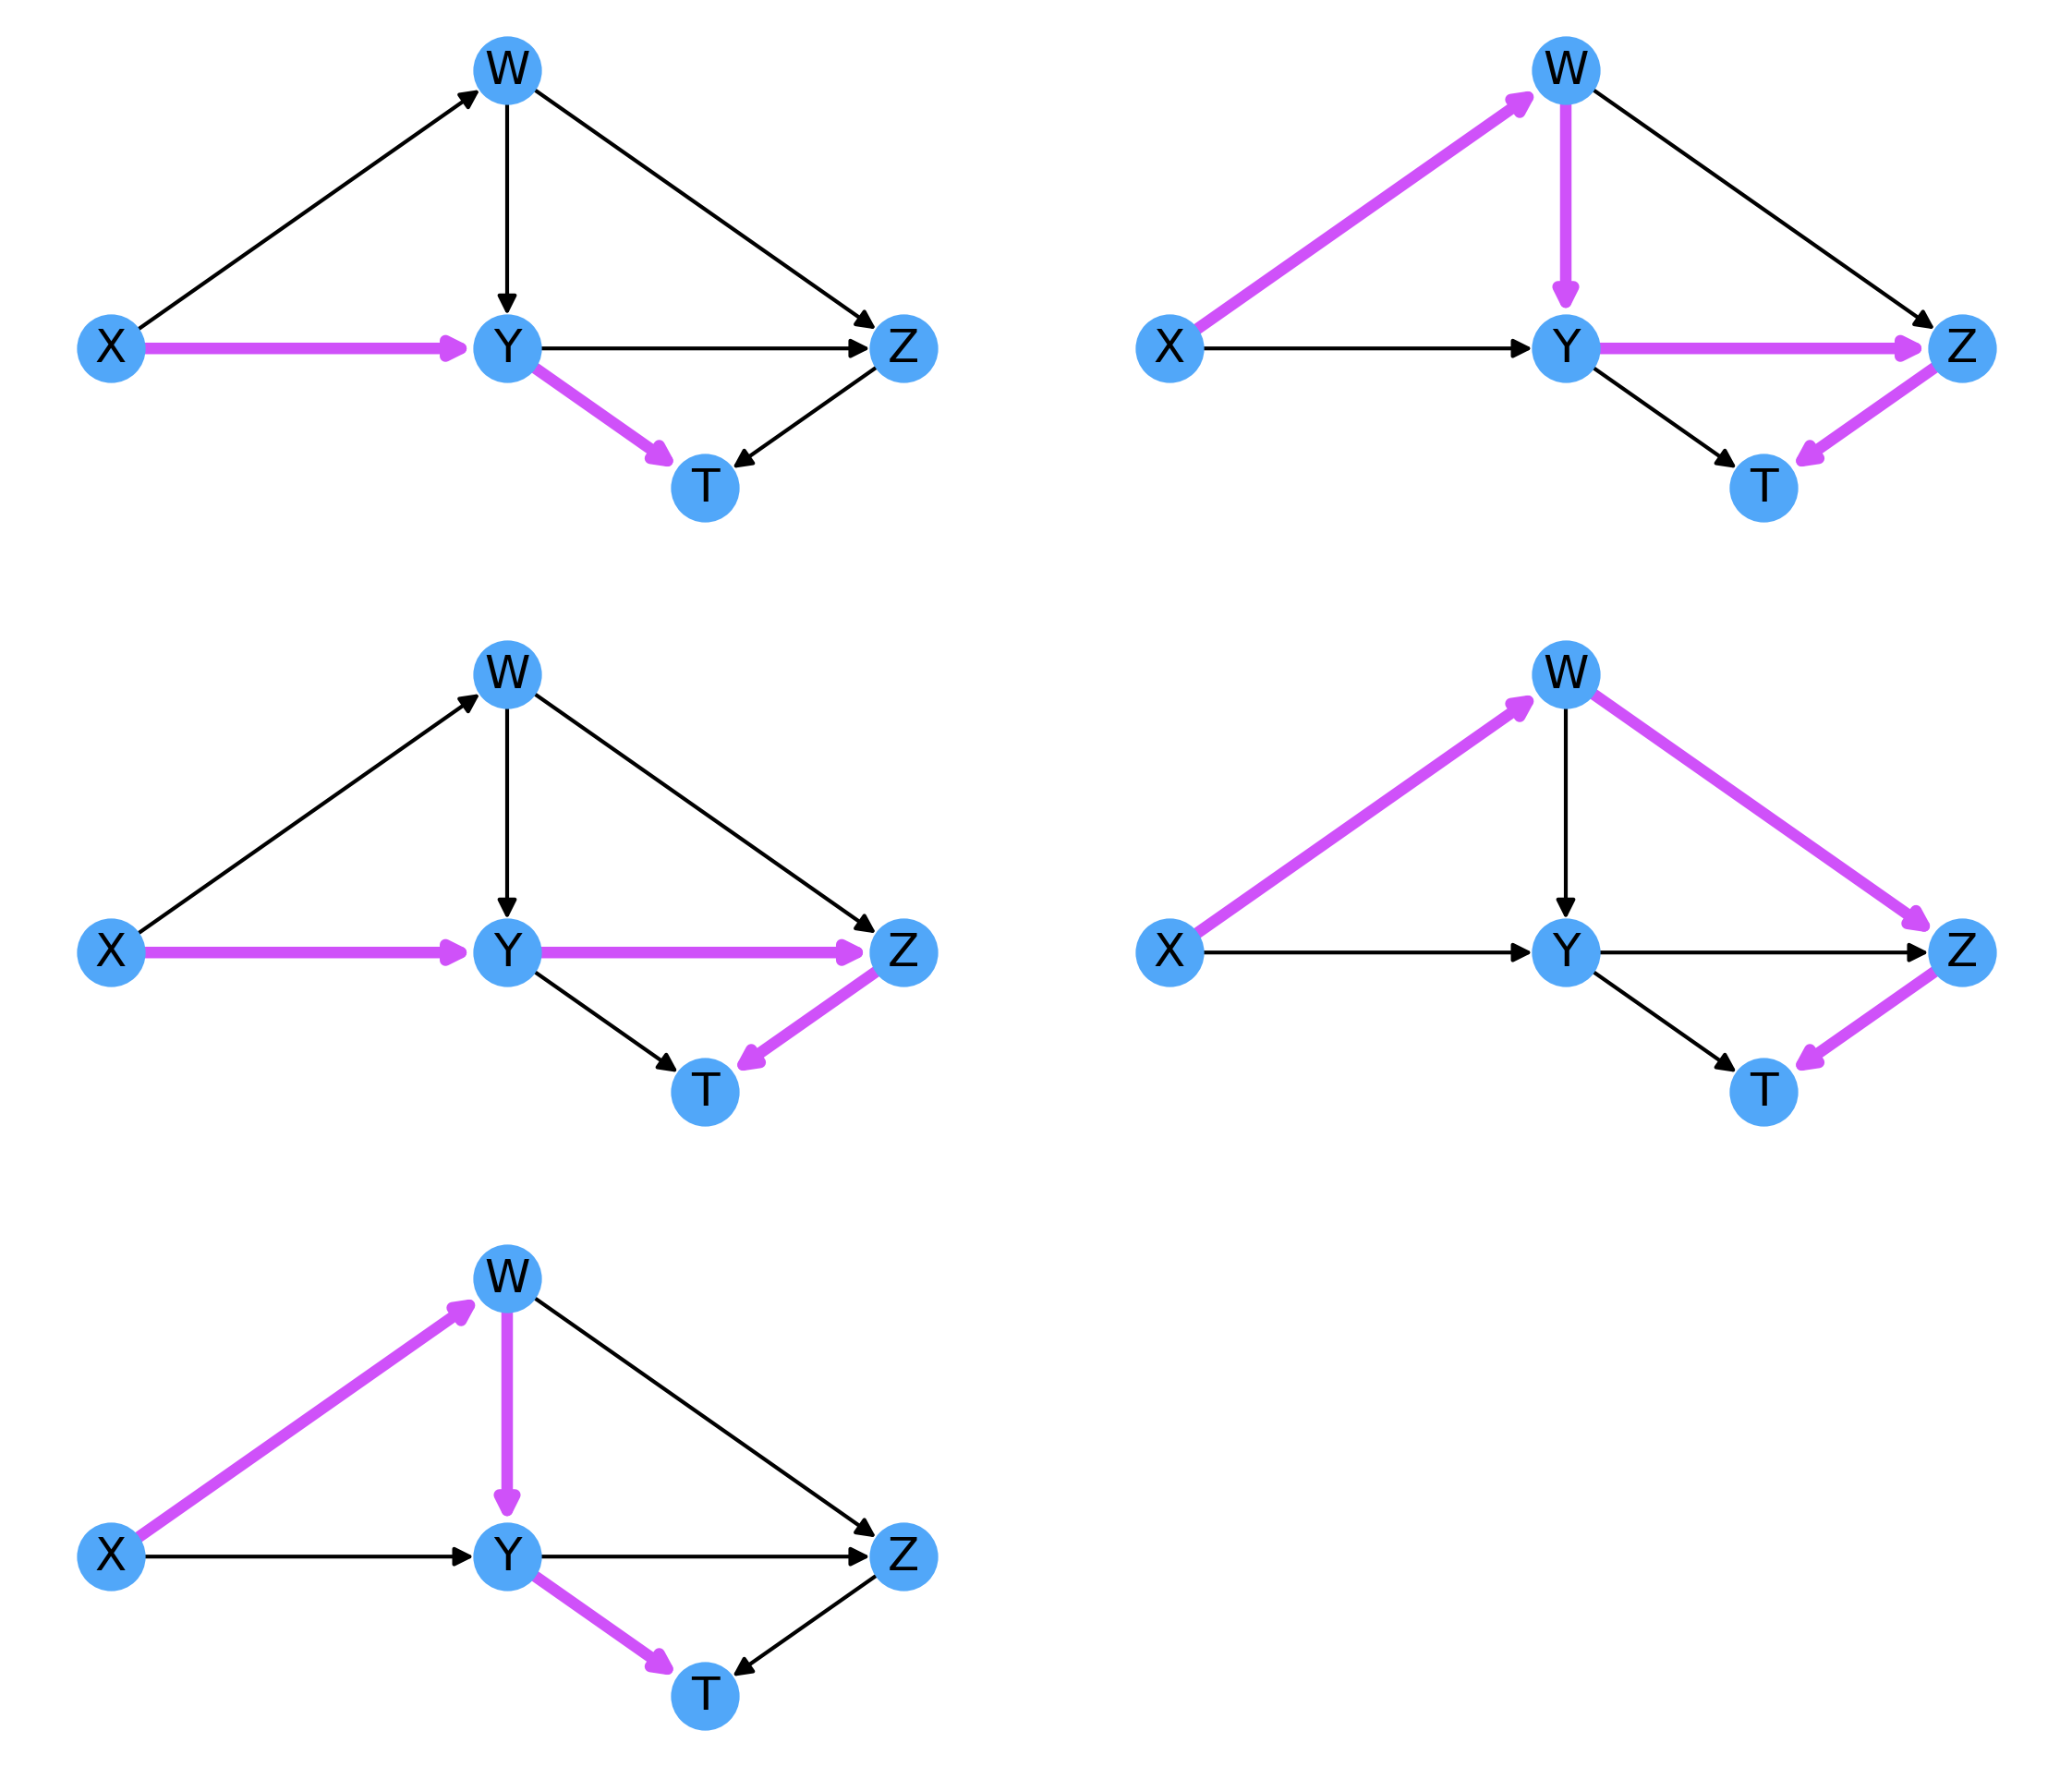

In [21]:
fig, axs = plt.subplots(3, 2, figsize=(8, 6.9))
axs = np.array(axs).flatten()

for i, path in enumerate(directed_paths):
    plot_path(G, pos, path, axs[i])

axs[-1].axis('off')
fig.tight_layout()

In some cases, we're also interested in all the paths, even if they break the direction of the edges. We can extract them all by converting our __DiGraph__ into a regular __Graph__ before calling __nx.all_simple_paths__

In [22]:
all_paths = {tuple(path) for path in nx.all_simple_paths(G.to_undirected(G), 'X', 'T')}

And we see that we find two extra paths

In [23]:
print(all_paths-directed_paths)

{('X', 'W', 'Z', 'Y', 'T'), ('X', 'Y', 'W', 'Z', 'T')}


That we can also visualize

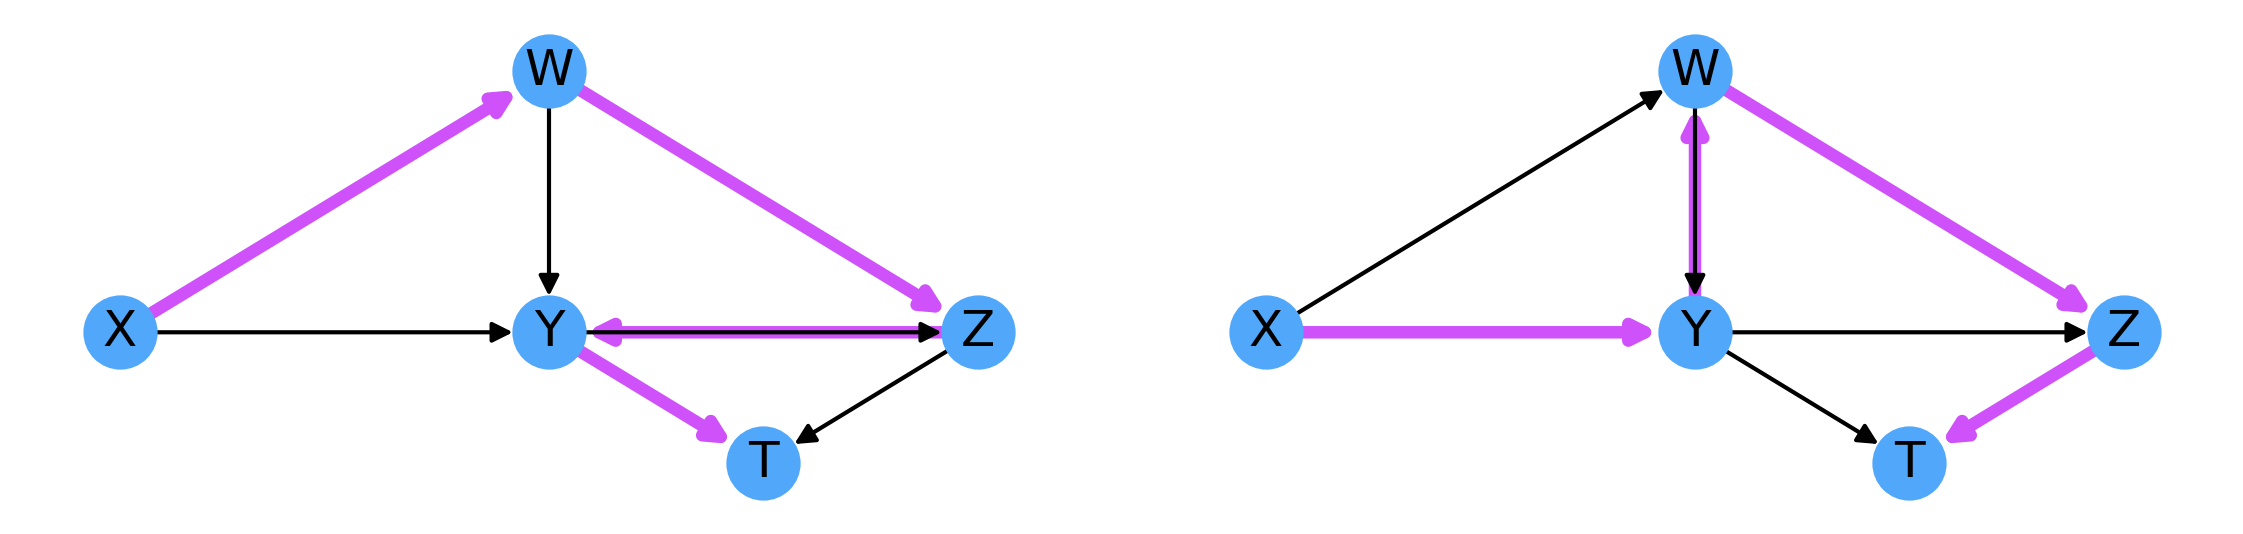

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(8, 2.3))
axs = np.array(axs).flatten()

new_paths = all_paths-directed_paths

for i, path in enumerate(new_paths):
    plot_path(G, pos, path, axs[i])

axs[-1].axis('off')
fig.tight_layout()

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>